<a href="https://colab.research.google.com/github/noely-b/PDM-Events/blob/main/TAcqPanel_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Tableau dashboard is based upon data on an event that I previously hosted at my college campus (Talent Acquisition Panel, Jan 2024). The personal project explains the data that was gathered at the event.


In [ ]:
#I'll be using Pandas for this project
import pandas as pd

In [ ]:
#Upload Excel datasheet
df = pd.read_excel('TAcqPanelReport.xlsx')

In [ ]:
#Verify the data
df.head()

,Account Type,Registration Date,Checked-In Date
0,Graduate Student,2024-01-10 08:00:30,2024-01-16 13:44:56
1,Undergraduate Student,2024-01-14 17:38:15,2024-01-16 13:15:00
2,Graduate Student,2024-01-16 09:16:46,2024-01-16 13:27:02
3,Undergraduate Student,2024-01-16 12:52:21,2024-01-16 12:52:21
4,Undergraduate Student,2024-01-16 12:52:23,2024-01-16 12:52:22


In [ ]:
#Basic info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Account Type       70 non-null     object        
 1   Registration Date  70 non-null     datetime64[ns]
 2   Checked-In Date    70 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 1.8+ KB


In [ ]:
#In order to conduct data visualization
import matplotlib.pyplot as plt

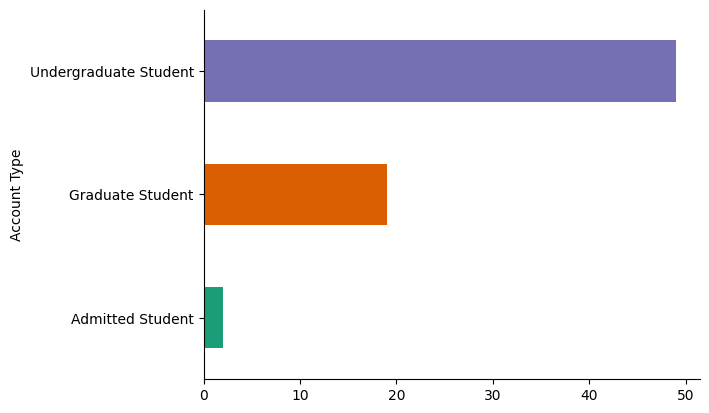

In [ ]:
#Bar graph that shows student/attendee type

# @title Account/Student Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Account Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The bar graph shows the amount of student types that went to the event. We see that the majority of the students that attended the event were undergrads, while we had <5 admitted students

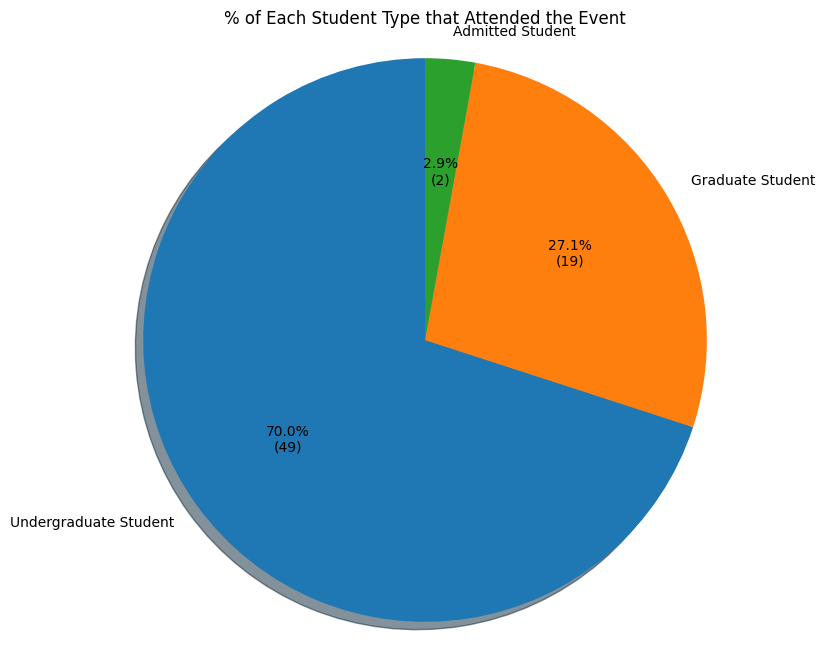

In [ ]:
#Pie chart that shows the percentage of each account type that came to the event

# Group by 'Account Type' and get the size of each group
account_type_counts = df['Account Type'].value_counts()

# Calculate the percentages for each account type
account_type_percentages = account_type_counts / account_type_counts.sum() * 100

# Function to format the percentage in the pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(account_type_counts, labels=account_type_counts.index, autopct=autopct_format(account_type_counts), startangle=90, shadow=True)

plt.title('% of Each Student Type that Attended the Event')
plt.axis('equal')
plt.show()

Here we can see with better detail the amount of student type that came to the event. While we can see that most students that came to the event were undergrads on the bar graph, we can see with the pie chart that they account for 70% of the attendees. Meanwhile, 27.1% of the attendees were grad students; and 2 admitted students came (accounting for 2.9% of total attendees)

# Check-In

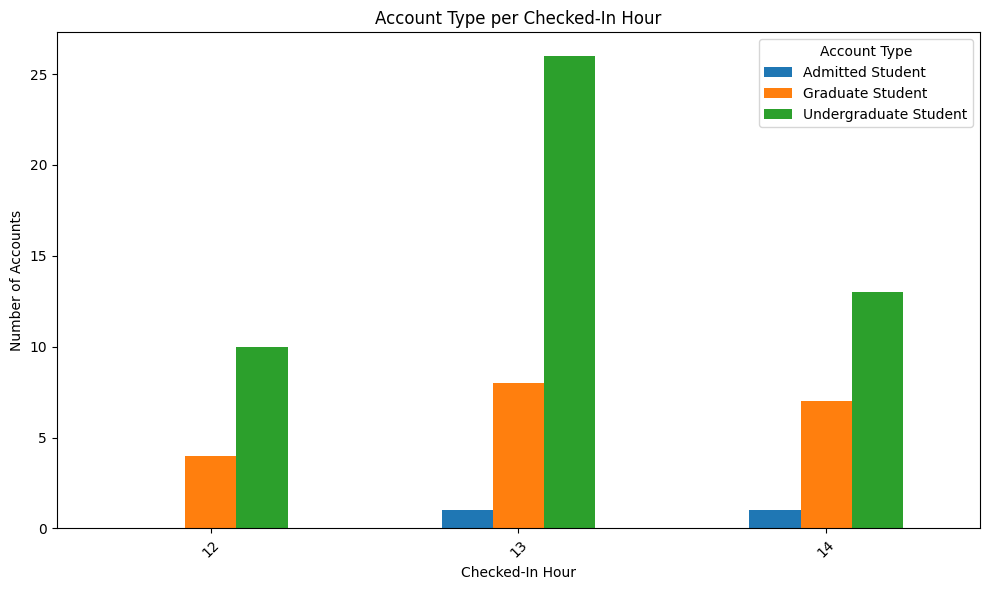

In [ ]:
#Student type that came in per checked-in hour


# Convert 'Registration Date' to datetime objects
df['Checked-In Date'] = pd.to_datetime(df['Checked-In Date'])

# Extract the hour of registration
df['Checked-In Hour'] = df['Checked-In Date'].dt.hour

# Group by registration hour and account type, then count occurrences
hourly_account_type = df.groupby(['Checked-In Hour', 'Account Type']).size().unstack(fill_value=0)

# Create the plot
hourly_account_type.plot(kind='bar', figsize=(10, 6))
plt.title('Account Type per Checked-In Hour')
plt.xlabel('Checked-In Hour')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.legend(title='Account Type')
plt.tight_layout()
plt.show()


The graph shows how many of each student type came at a specific hour. We can say that most:

*   Undergrads came in at 1PM
*   Grad Students came in at 1PM, though many of them came at 2PM
*   Admitted Students is split -> half of them came in at 1PM and the other 50% came at 2PM




